In [102]:
import csv
import re

In [103]:
with open('rs.csv', 'r', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    data = [row for row in reader]

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from catppuccin import Flavour
ctp = Flavour.mocha()


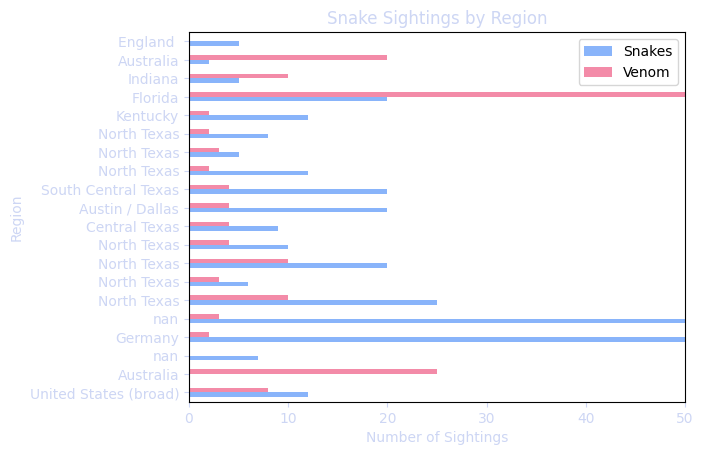

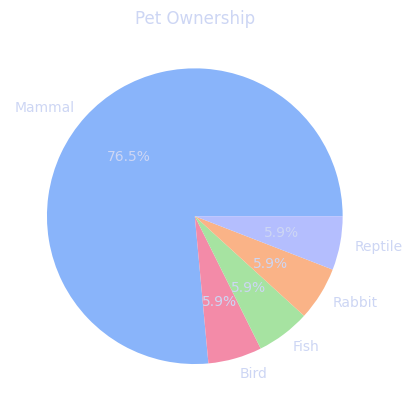

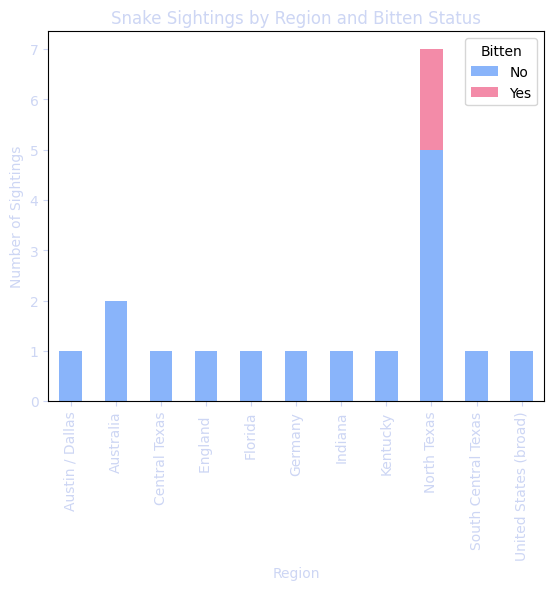

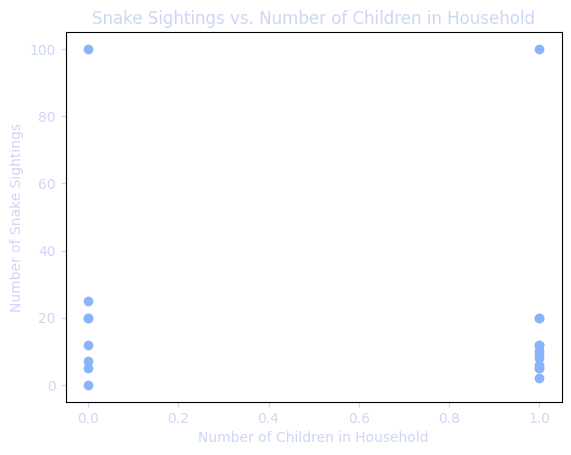

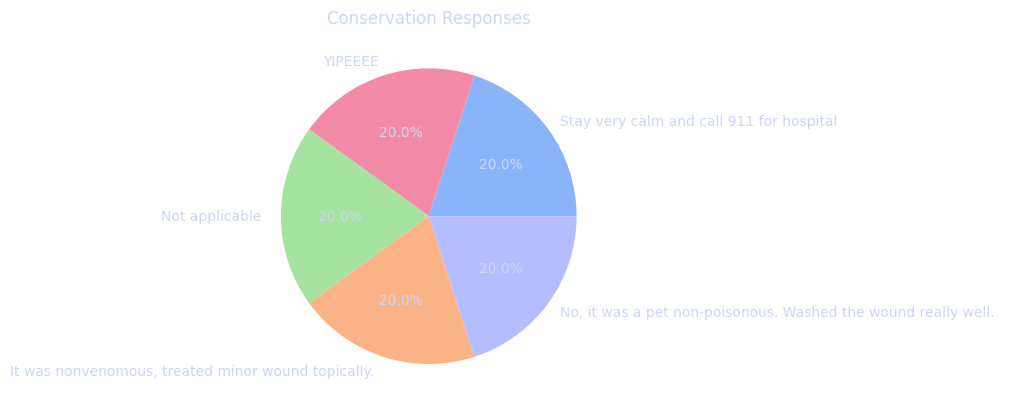

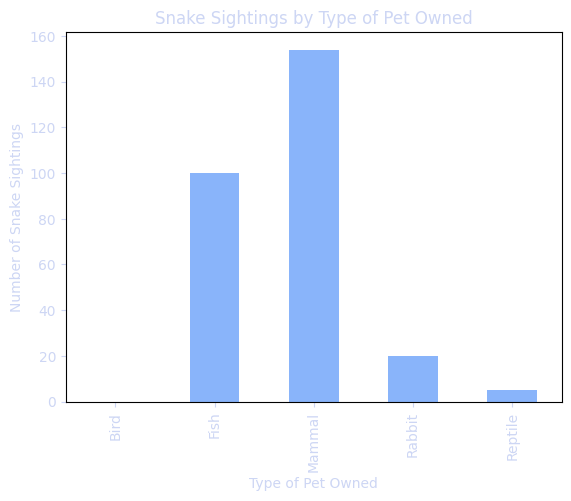

In [105]:
# read csv file into a pandas dataframe
df = pd.read_csv('rs.csv')

# clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(','').str.replace(')','')


# create a horizontal bar chart of snake sightings by region
fig, ax = plt.subplots()
df.plot(kind='barh', x='region', y=['snakes', 'venom'], color=["#"+ctp.blue.hex, "#"+ctp.red.hex], ax=ax)
ax.legend(['Snakes', 'Venom'], )
ax.set_xlabel('Number of Sightings', color=f"#{ctp.text.hex}")
ax.set_ylabel('Region', color=f"#{ctp.text.hex}")
plt.title('Snake Sightings by Region', color=f"#{ctp.text.hex}")
# limit x to not go past 50
plt.xlim(0, 50)
plt.tick_params(colors=f"#{ctp.text.hex}")
plt.savefig('snake_sightings.png', transparent=True)
plt.show()

# create a pie chart of pet ownership
pet_counts = df['own'].value_counts()
fig, ax = plt.subplots()
colors = ["#"+ctp.blue.hex, "#"+ctp.red.hex, "#"+ctp.green.hex, "#"+ctp.peach.hex, "#"+ctp.lavender.hex]
ax.pie(pet_counts, colors=colors, labels=pet_counts.index, autopct='%1.1f%%', textprops={'color': f"#{ctp.text.hex}"})
plt.title('Pet Ownership', color=f"#{ctp.text.hex}")
plt.ylabel('')
plt.tick_params(colors=f"#{ctp.text.hex}")
plt.savefig('pet_ownership.png', transparent=True)
plt.show()

# create stacked bar chart of snake sightings by region and bitten status
bitten_counts = df.groupby(['region', 'bitten']).size().unstack()
bitten_counts.plot(kind='bar', stacked=True, color=["#"+ctp.blue.hex, "#"+ctp.red.hex])
plt.xlabel('Region', color=f"#{ctp.text.hex}")
plt.ylabel('Number of Sightings', color=f"#{ctp.text.hex}")
plt.title('Snake Sightings by Region and Bitten Status', color=f"#{ctp.text.hex}")
plt.tick_params(colors=f"#{ctp.text.hex}")
plt.legend(title='Bitten', labels=['No', 'Yes'])
plt.savefig('snake_sightings_bitten.png', transparent=True)
plt.show()

# create scatter plot of snake sightings and number of children in household
df['children'] = df['children'].replace({'No': 0, 'Yes': 1})
plt.scatter(df['children'], df['snakes'], color="#"+ctp.blue.hex)
plt.xlabel('Number of Children in Household', color=f"#{ctp.text.hex}")
plt.ylabel('Number of Snake Sightings', color=f"#{ctp.text.hex}")
plt.title('Snake Sightings vs. Number of Children in Household', color=f"#{ctp.text.hex}")
plt.tick_params(colors=f"#{ctp.text.hex}")
plt.savefig('snake_sightings_children.png', transparent=True)
plt.show()

# create pie chart of conservation responses
conservation_counts = df['response'].value_counts()
fig, ax = plt.subplots()
colors = ["#"+ctp.blue.hex, "#"+ctp.red.hex, "#"+ctp.green.hex, "#"+ctp.peach.hex, "#"+ctp.lavender.hex]
ax.pie(conservation_counts, colors=colors, labels=conservation_counts.index, autopct='%1.1f%%', textprops={'color': f"#{ctp.text.hex}"})
plt.title('Conservation Responses', color=f"#{ctp.text.hex}")
plt.ylabel('')
plt.tick_params(colors=f"#{ctp.text.hex}")
plt.savefig('conservation_responses.png', transparent=True)
plt.show()

# create bar chart of snake sightings by type of pet owned
pet_counts = df.groupby('own').sum()['snakes']
pet_counts.plot(kind='bar', color="#"+ctp.blue.hex)
plt.xlabel('Type of Pet Owned', color=f"#{ctp.text.hex}")
plt.ylabel('Number of Snake Sightings', color=f"#{ctp.text.hex}")
plt.title('Snake Sightings by Type of Pet Owned', color=f"#{ctp.text.hex}")
plt.tick_params(colors=f"#{ctp.text.hex}")
plt.savefig('snake_sightings_pets.png', transparent=True)
plt.show()


